
##**The Task:**

Partition the data for training and testing.

Using straightforward Python, find the higher/lower highs and higher/lower lows with a 5 back + 5 ahead rolling window.  (Note that 5 bars must pass before the higher/lower highs/lows are known.)  

Use deep learning to train a system so that it correctly identifies HH, HL, LL, and LH prices and times in the test data.  

If the above was relatively simple, then you can also try:

Design version 2 that attempts to predict when the HL and LH will occur at least 1 bar ahead of the 5 bar lag and provide an analysis of its performance.

## TASK 1:

In [1]:
#imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install torch torchvision
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [2]:
#reading csv file
df = pd.read_csv("/content/QQQ_whole_ET.csv")

In [3]:
#data looks like
df.head(10)

,DateTime,Open,High,Low,Close
0,2022-07-06 09:30:00,287.35,287.84,286.98,287.11
1,2022-07-06 09:31:00,287.01,287.76,286.83,287.41
2,2022-07-06 09:32:00,287.41,288.74,287.41,288.32
3,2022-07-06 09:33:00,288.33,288.65,288.09,288.33
4,2022-07-06 09:34:00,288.32,288.44,287.67,287.82
5,2022-07-06 09:35:00,287.82,288.03,287.08,287.24
6,2022-07-06 09:36:00,287.23,287.36,286.44,286.71
7,2022-07-06 09:37:00,286.78,286.84,286.02,286.15
8,2022-07-06 09:38:00,286.15,286.62,285.91,286.33
9,2022-07-06 09:39:00,286.32,286.68,286.03,286.12


import numpy as np
from google.colab import autoviz
df_6804859869388216087 = autoviz.get_df('df_6804859869388216087')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6804859869388216087, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2286611060426693933 = autoviz.get_df('df_2286611060426693933')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2286611060426693933, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5240001231726192433 = autoviz.get_df('df_5240001231726192433')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5240001231726192433, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3105213848661093965 = autoviz.get_df('df_3105213848661093965')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3105213848661093965, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2188391353664187220 = autoviz.get_df('df_2188391353664187220')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2188391353664187220, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5986953610393092431 = autoviz.get_df('df_5986953610393092431')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5986953610393092431, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5610442805958728954 = autoviz.get_df('df_5610442805958728954')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5610442805958728954, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7414265044703030306 = autoviz.get_df('df_7414265044703030306')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7414265044703030306, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4581898985868565369 = autoviz.get_df('df_4581898985868565369')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4581898985868565369, *[[['index', 'Open'], ['Open', 'High'], ['High', 'Low'], ['Low', 'Close']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_508278364445756458 = autoviz.get_df('df_508278364445756458')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_508278364445756458, *['DateTime', 'Open', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5143368394120171486 = autoviz.get_df('df_5143368394120171486')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5143368394120171486, *['DateTime', 'High', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5345046916429670081 = autoviz.get_df('df_5345046916429670081')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5345046916429670081, *['DateTime', 'Low', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_650309556167981350 = autoviz.get_df('df_650309556167981350')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_650309556167981350, *['DateTime', 'Close', None], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


---------------------------------------------------------------------------------

##Understanding the concept:
Higher High, Higher Low : Uptrend

Lower High, Lower Low : Downtrend
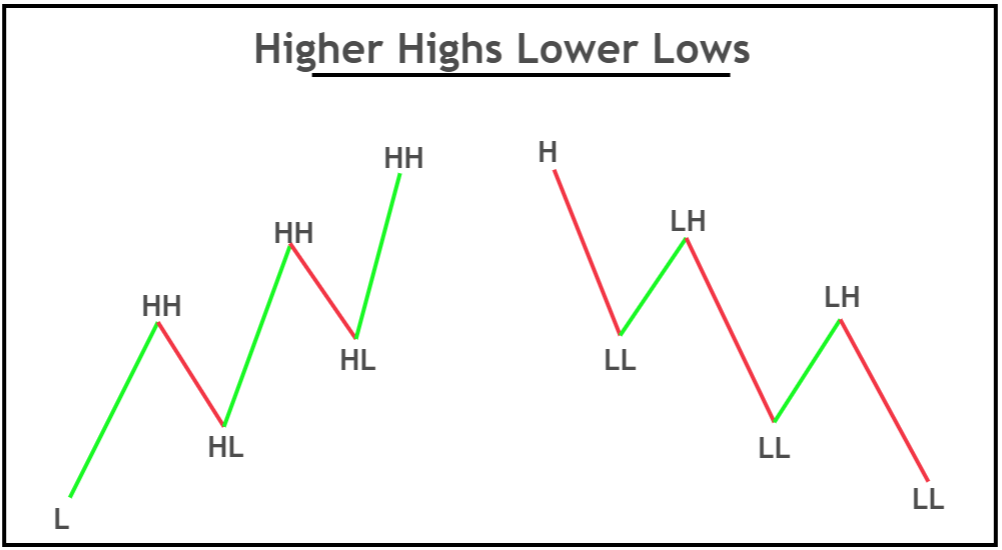

In [7]:
len(df)

98015

In [8]:
df.columns

Index(['DateTime', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [9]:
#checking all data is in float and not string
type(df["Open"][0])

numpy.float64

## Let's try to see the data chart before moving forward

In [10]:
#Lets see first 25 candlestick of the data $QQQ
temp_df = df.iloc[:25]

In [11]:
#Using Plotly go library to plot candlesticks
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
chart = go.Figure(data=[go.Candlestick(x=temp_df['DateTime'],
                open=temp_df['Open'],
                high=temp_df['High'],
                low=temp_df['Low'],
                close=temp_df['Close'])])

chart.show()

##Finding HH, HL, LL, LH and Data partitioning using sklearn





In [12]:
import pandas as pd

def find_high_low_patterns(df):
    patterns = []

    for i in range(5, len(df) - 5):
        max_high = max(df['High'][i - 5: i + 6])
        min_low = min(df['Low'][i - 5: i + 6])
        current_high = df['High'][i]
        current_low = df['Low'][i]
        if current_high >= max_high and current_low > min_low:
            patterns.append('HH')  # Higher High
        elif current_high < max_high and current_low > min_low:
            patterns.append('HL')  # Higher Low
        elif current_high < max_high and current_low <= min_low:
            patterns.append('LL')  # Lower Low
        elif current_high > max_high and current_low < min_low:
            patterns.append('LH')  # Lower High
        else:
            patterns.append('None')  # No clear pattern
    df['Pattern'] = ['None'] * 5 + patterns + ['None'] * 5
    return df



In [13]:
d = find_high_low_patterns(df)

In [14]:
d.head(25)

,DateTime,Open,High,Low,Close,Pattern
0,2022-07-06 09:30:00,287.35,287.84,286.98,287.11,None
1,2022-07-06 09:31:00,287.01,287.76,286.83,287.41,None
2,2022-07-06 09:32:00,287.41,288.74,287.41,288.32,None
3,2022-07-06 09:33:00,288.33,288.65,288.09,288.33,None
4,2022-07-06 09:34:00,288.32,288.44,287.67,287.82,None
5,2022-07-06 09:35:00,287.82,288.03,287.08,287.24,HL
6,2022-07-06 09:36:00,287.23,287.36,286.44,286.71,HL
7,2022-07-06 09:37:00,286.78,286.84,286.02,286.15,HL
8,2022-07-06 09:38:00,286.15,286.62,285.91,286.33,LL
9,2022-07-06 09:39:00,286.32,286.68,286.03,286.12,HL


import numpy as np
from google.colab import autoviz
df_7608532612848199678 = autoviz.get_df('df_7608532612848199678')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7608532612848199678, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2440994608931560519 = autoviz.get_df('df_2440994608931560519')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2440994608931560519, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2974262745939699095 = autoviz.get_df('df_2974262745939699095')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2974262745939699095, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6539538299251179520 = autoviz.get_df('df_6539538299251179520')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6539538299251179520, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8292354472931783420 = autoviz.get_df('df_8292354472931783420')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8292354472931783420, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2956805411160836755 = autoviz.get_df('df_2956805411160836755')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2956805411160836755, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6729890006166656692 = autoviz.get_df('df_6729890006166656692')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6729890006166656692, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7517343190833028064 = autoviz.get_df('df_7517343190833028064')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7517343190833028064, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz
df_645035469575252496 = autoviz.get_df('df_645035469575252496')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_645035469575252496, *['Pattern'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8298022868667629245 = autoviz.get_df('df_8298022868667629245')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8298022868667629245, *[[['index', 'Open'], ['Open', 'High'], ['High', 'Low'], ['Low', 'Close']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7215616586861476756 = autoviz.get_df('df_7215616586861476756')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7215616586861476756, *['index', 'Pattern'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4620853940314831487 = autoviz.get_df('df_4620853940314831487')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4620853940314831487, *['Open', 'Pattern'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8740233876771110334 = autoviz.get_df('df_8740233876771110334')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8740233876771110334, *['High', 'Pattern'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7060400090941549470 = autoviz.get_df('df_7060400090941549470')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7060400090941549470, *['Low', 'Pattern'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1407887938934858181 = autoviz.get_df('df_1407887938934858181')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1407887938934858181, *['DateTime', 'Open', 'Pattern'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2362162216063518351 = autoviz.get_df('df_2362162216063518351')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2362162216063518351, *['DateTime', 'High', 'Pattern'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2330663390644261516 = autoviz.get_df('df_2330663390644261516')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2330663390644261516, *['DateTime', 'Low', 'Pattern'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2091139970638902897 = autoviz.get_df('df_2091139970638902897')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2091139970638902897, *['DateTime', 'Close', 'Pattern'], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [15]:
label_encoder = LabelEncoder()
d['Pattern'] = label_encoder.fit_transform(d['Pattern'])


In [16]:
d.tail(250)

,DateTime,Open,High,Low,Close,Pattern
97765,2023-07-10 11:50:00,364.75,364.85,364.66,364.80,1
97766,2023-07-10 11:51:00,364.81,364.90,364.66,364.66,1
97767,2023-07-10 11:52:00,364.67,364.87,364.66,364.85,1
97768,2023-07-10 11:53:00,364.85,365.06,364.85,365.04,1
97769,2023-07-10 11:54:00,365.06,365.13,365.01,365.12,1
...,...,...,...,...,...,...
98010,2023-07-10 15:55:00,366.05,366.12,365.98,366.11,3
98011,2023-07-10 15:56:00,366.11,366.23,366.06,366.07,3
98012,2023-07-10 15:57:00,366.06,366.13,366.03,366.10,3
98013,2023-07-10 15:58:00,366.10,366.15,366.04,366.14,3


In [17]:
train_data, test_data = train_test_split(d, test_size=0.2, shuffle=False)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [19]:
X_train = torch.tensor(train_data[['Open', 'High', 'Low', 'Close']].values, dtype=torch.float32)
y_train = torch.tensor(train_data['Pattern'].values, dtype=torch.long)
X_test = torch.tensor(test_data[['Open', 'High', 'Low', 'Close']].values, dtype=torch.float32)
y_test = torch.tensor(test_data['Pattern'].values, dtype=torch.long)

In [20]:
# Create DataLoader
#for training and testing datasets
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [18]:
# Neural network model
class PatternClassifier(nn.Module):
    def __init__(self):
        super(PatternClassifier, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.softmax(x, dim=-1)

model = PatternClassifier()

# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

#Train the model
epochs = 10
for epoch in range(epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

#Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f'Test accuracy: {accuracy}')


Test accuracy: 0.8645105341019231


In [21]:
print('Accuracy %:', accuracy*100)

Accuracy %: 86.45105341019232


##Task 2
1 bar ahead 5 bar behind

In [22]:
import pandas as pd

def find_high_low_patterns(df):
    patterns = []

    for i in range(5, len(df) - 1):
        max_high = max(df['High'][i - 5: i + 1])
        min_low = min(df['Low'][i - 5: i + 1])
        current_high = df['High'][i]
        current_low = df['Low'][i]
        if current_high >= max_high and current_low > min_low:
            patterns.append('HH')  # Higher High
        elif current_high < max_high and current_low > min_low:
            patterns.append('HL')  # Higher Low
        elif current_high < max_high and current_low <= min_low:
            patterns.append('LL')  # Lower Low
        elif current_high > max_high and current_low < min_low:
            patterns.append('LH')  # Lower High
        else:
            patterns.append('None')  # No clear pattern
    df['Pattern'] = ['None'] * 5 + patterns + ['None'] * 1
    return df

In [23]:
d = find_high_low_patterns(df)

In [24]:
d.head(25)

,DateTime,Open,High,Low,Close,Pattern
0,2022-07-06 09:30:00,287.35,287.84,286.98,287.11,None
1,2022-07-06 09:31:00,287.01,287.76,286.83,287.41,None
2,2022-07-06 09:32:00,287.41,288.74,287.41,288.32,None
3,2022-07-06 09:33:00,288.33,288.65,288.09,288.33,None
4,2022-07-06 09:34:00,288.32,288.44,287.67,287.82,None
5,2022-07-06 09:35:00,287.82,288.03,287.08,287.24,HL
6,2022-07-06 09:36:00,287.23,287.36,286.44,286.71,LL
7,2022-07-06 09:37:00,286.78,286.84,286.02,286.15,LL
8,2022-07-06 09:38:00,286.15,286.62,285.91,286.33,LL
9,2022-07-06 09:39:00,286.32,286.68,286.03,286.12,HL


In [25]:
label_encoder = LabelEncoder()
d['Pattern'] = label_encoder.fit_transform(d['Pattern'])

In [26]:
train_data, test_data = train_test_split(d, test_size=0.2, shuffle=False)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [27]:
X_train = torch.tensor(train_data[['Open', 'High', 'Low', 'Close']].values, dtype=torch.float32)
y_train = torch.tensor(train_data['Pattern'].values, dtype=torch.long)
X_test = torch.tensor(test_data[['Open', 'High', 'Low', 'Close']].values, dtype=torch.float32)
y_test = torch.tensor(test_data['Pattern'].values, dtype=torch.long)

In [28]:
# Create DataLoader
#for training and testing datasets
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [29]:
# Neural network model
class PatternClassifier(nn.Module):
    def __init__(self):
        super(PatternClassifier, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.softmax(x, dim=-1)

model = PatternClassifier()

# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Training
epochs = 10
for epoch in range(epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

#Evaluate
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f'Test accuracy: {accuracy}')


Test accuracy: 0.47105034943631074


In [31]:
print('Accuracy %:', accuracy*100)

Accuracy %: 47.105034943631075


Performance dropped in 2nd case.